In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
# from astropy.io import fits
# from astropy.wcs import WCS
from IPython.display import HTML

In [2]:
plt.rcParams["figure.figsize"] = (12, 10)
# plt.rcParams['animation.html'] = 'jshtml'

In [3]:
fits_file = "supernovae/tess-s0001-4-1_64.525833_-63.615669_100x100_astrocut.fits"

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array


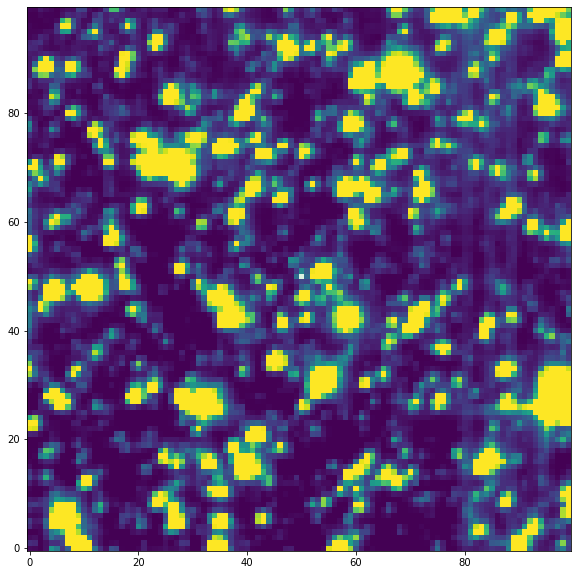

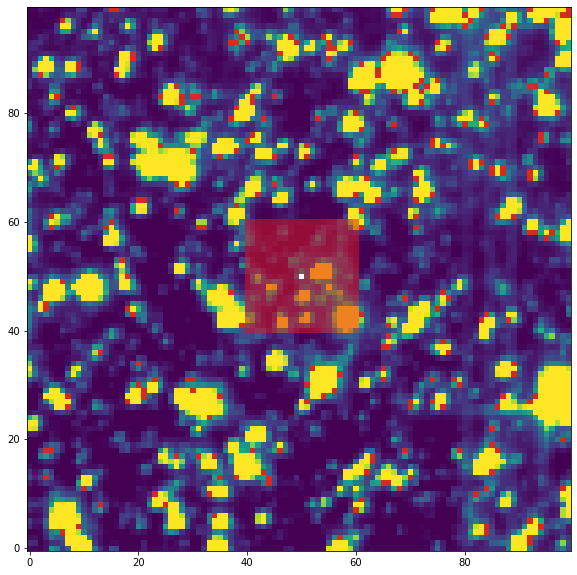

In [4]:
check_background = tess_cpm.Source(fits_file, remove_bad=True)
check_background.set_aperture(rowlims=[50, 50], collims=[50, 50])
f = check_background.plot_cutout(show_aperture=True)
check_background.add_cpm_model(predictor_method="similar_brightness")
fig = check_background.models[0][0].plot_model()

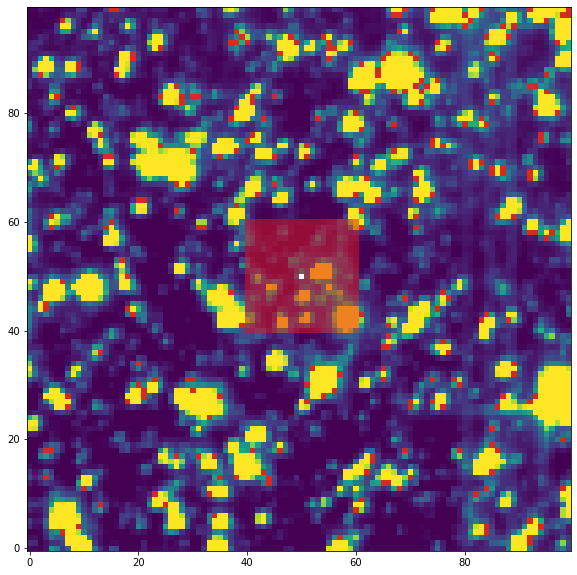

In [5]:
fig
# fig.savefig("asassn-18tb_exclusion.png", dpi=200)

In [6]:
sn = tess_cpm.Source(fits_file, remove_bad=True)

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array


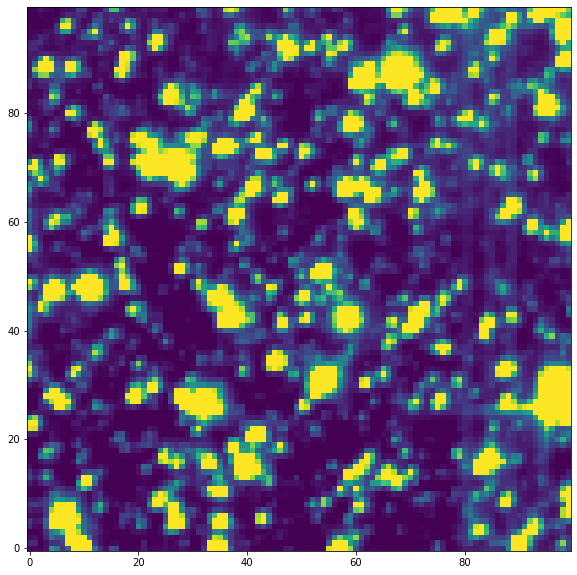

In [7]:
fig = sn.plot_cutout();
# fig.savefig("asas-sn18tb_FFI_cutout.png", dpi=200)
# fig

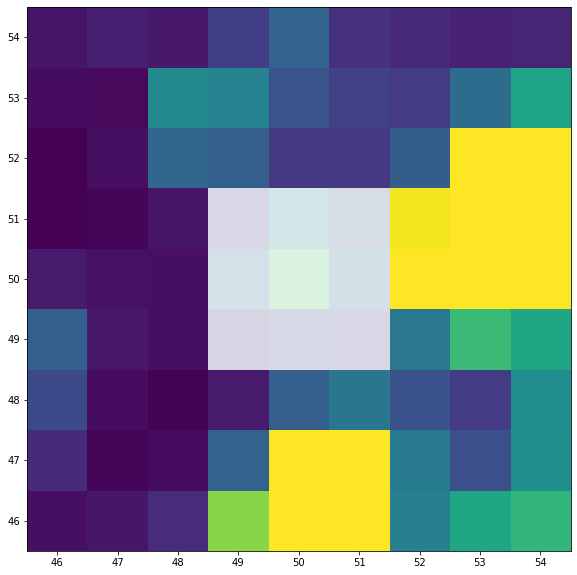

In [8]:
sn.set_aperture(rowlims=[49, 51], collims=[49, 51])  
# sn.set_aperture(rowlims=[50, 51], collims=[50, 51])
fig = sn.plot_cutout(rowlims=[46, 54], collims=[46, 54], show_aperture=True)
# fig.savefig("with_aperture_zoom_asas-sn18tb_FFI_cutout.png", dpi=200)
# fig

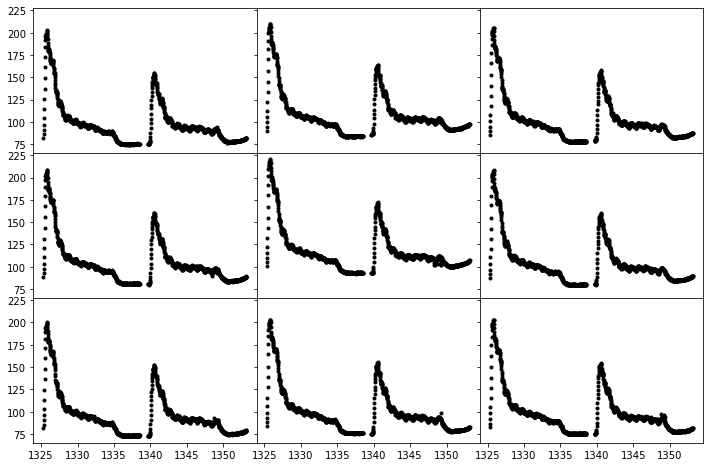

In [9]:
fig, axs = sn.plot_pix_by_pix(data_type="raw")
# axs[0,1].set_xlabel("Time - 2457000 [Days]", fontsize=30)
# axs[1,0].set_ylabel("Flux [e-/s]", fontsize=30)
# # fig.suptitle("ASASSN-18tb", y=0.91)
# fig
# fig.savefig("asas-sn18tb_pixel_raw.png", dpi=300)

In [10]:
sn.add_cpm_model(predictor_method="similar_brightness")
# sn.add_cpm_model(predictor_method="cosine_similarity")

sn.add_poly_model()
sn.set_regs([0.001, 0.1])
sn.holdout_fit_predict(k=50);

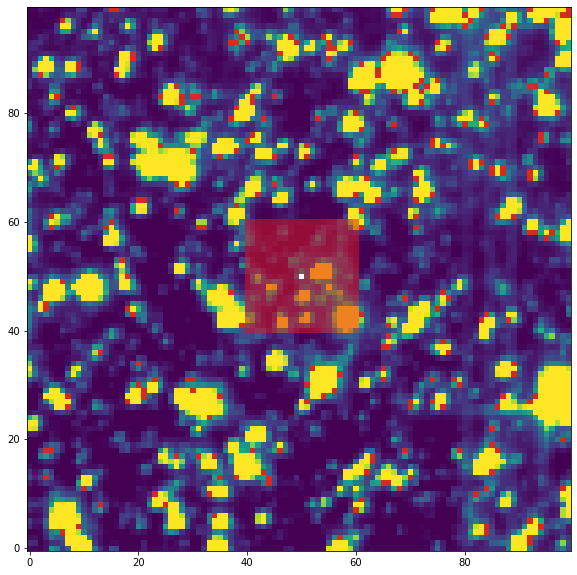

In [11]:
sn.models[1][1].plot_model();

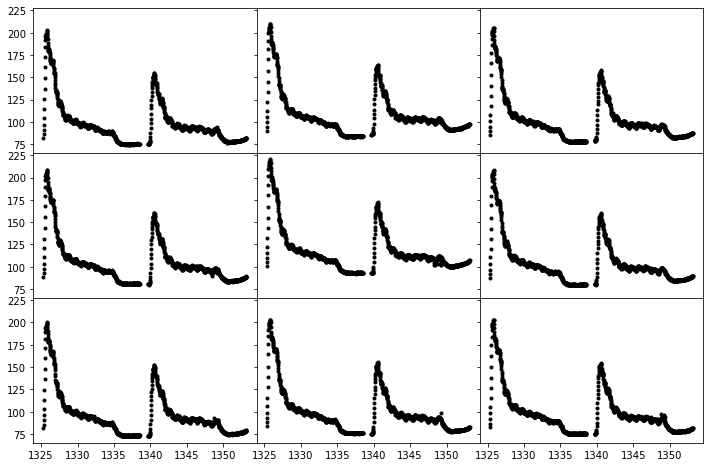

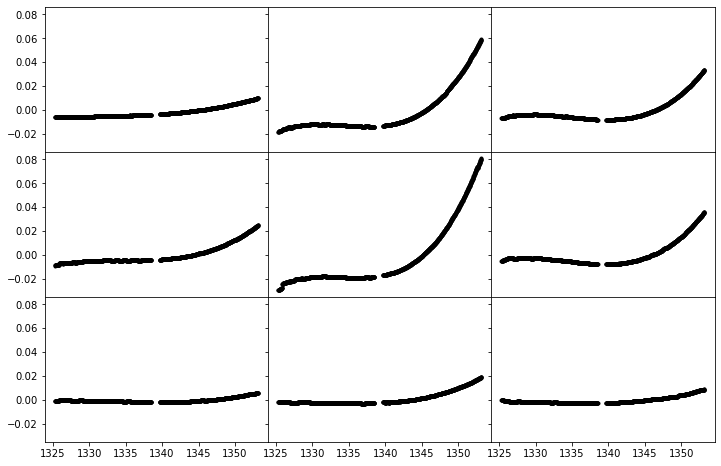

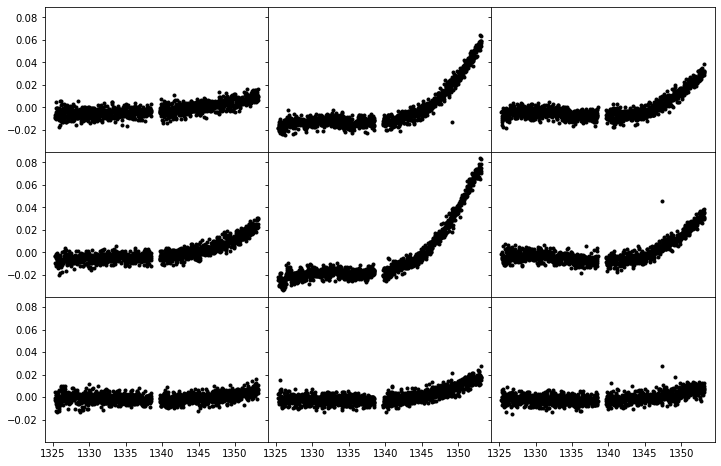

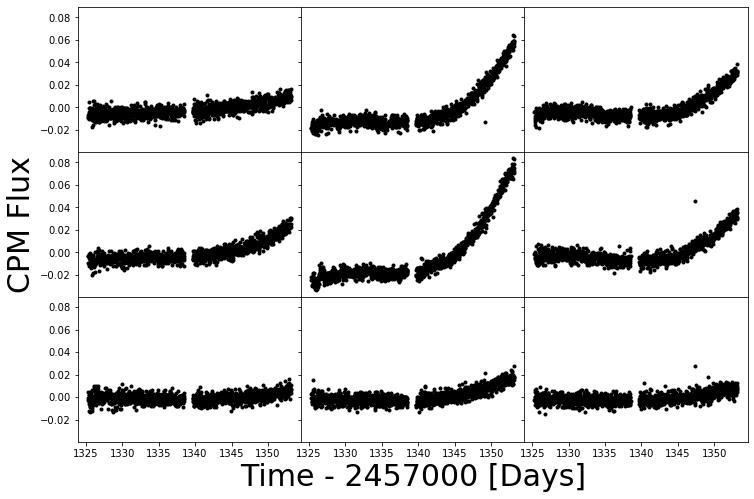

In [12]:
fig, axs = sn.plot_pix_by_pix(data_type="raw", split=False);
fig, axs = sn.plot_pix_by_pix(data_type="poly_model_prediction");
fig, axs = sn.plot_pix_by_pix(data_type="cpm_subtracted_flux");

axs[2,1].set_xlabel("Time - 2457000 [Days]", fontsize=30)
axs[1,0].set_ylabel("CPM Flux", fontsize=30)
fig
# fig.savefig("asas-sn18tb_pixel_detrended_flux.png", dpi=300)

In [ ]:
ani = sn.make_animation(data_type="cpm_subtracted_flux", h=100, thin=10)
HTML(ani.to_jshtml())

In [13]:
flux = sn.get_aperture_lc(data_type="normalized_flux")
cpm_prediction = sn.get_aperture_lc(data_type="cpm_prediction")
poly_prediction = sn.get_aperture_lc(data_type="poly_model_prediction")
sector1_rescaled_cpm_subtracted_flux = sn.get_aperture_lc(data_type="rescaled_cpm_subtracted_flux")
sector1_cpm_subtracted_flux = sn.get_aperture_lc(data_type="cpm_subtracted_flux")

Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves
Summing over 3 x 3 pixel lightcurves


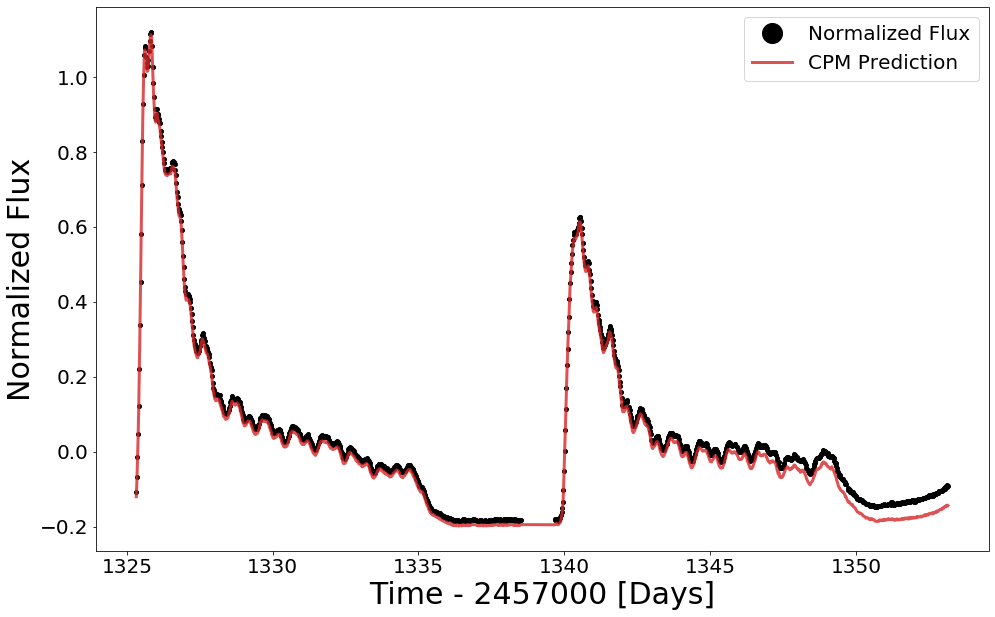

In [15]:
plt.figure(figsize=(16, 10))
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("Normalized Flux", fontsize=30)
plt.plot(sn.time, flux, ".", c="k", ms=8, label="Normalized Flux")
plt.plot(sn.time, cpm_prediction-0.02, "-", lw=3, c="C3", alpha=0.8, label="CPM Prediction")
plt.legend(fontsize=20, markerscale=5)
# plt.plot(sn.time, poly_prediction)
# plt.plot(sn.time, sector1_cpm_subtracted_flux, c="k")
plt.tick_params(labelsize=20)
# plt.savefig("sector1_asassn-18tb_normalized_flux_cpm_prediction.png", dpi=300)

In [16]:
fits_file = "supernovae/tess-s0002-4-1_64.525833_-63.615669_100x100_astrocut.fits"

In [17]:
sn2 = tess_cpm.Source(fits_file, remove_bad=True)

Removing 17 bad data points (out of 1245) using the TESS provided QUALITY array


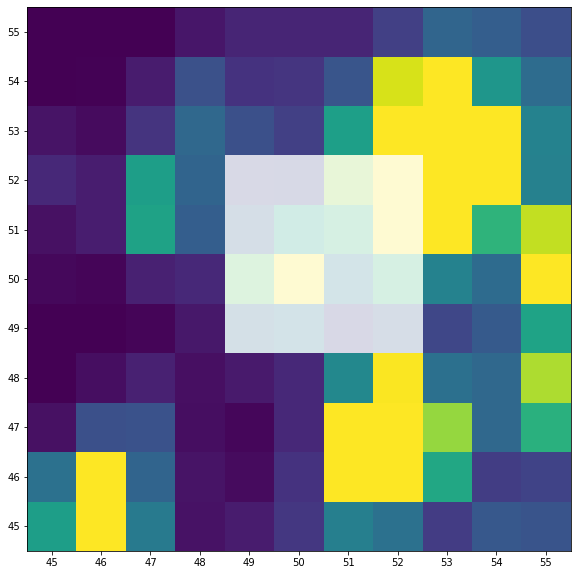

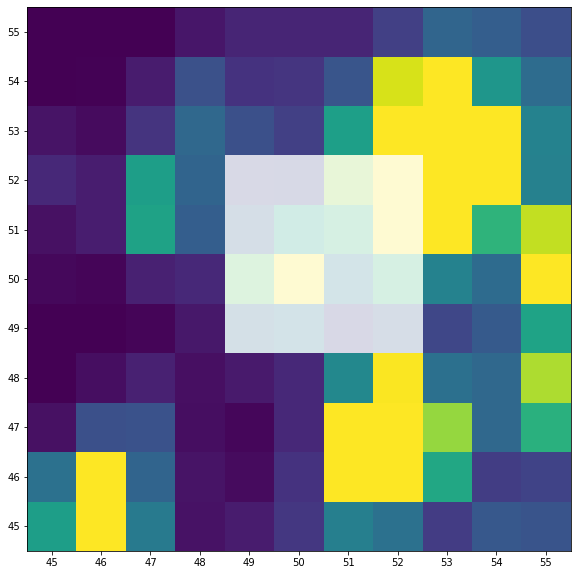

In [19]:
sn2.set_aperture(rowlims=[49, 52], collims=[49, 52])
sn2.plot_cutout(rowlims=[45, 55], collims=[45, 55], show_aperture=True)

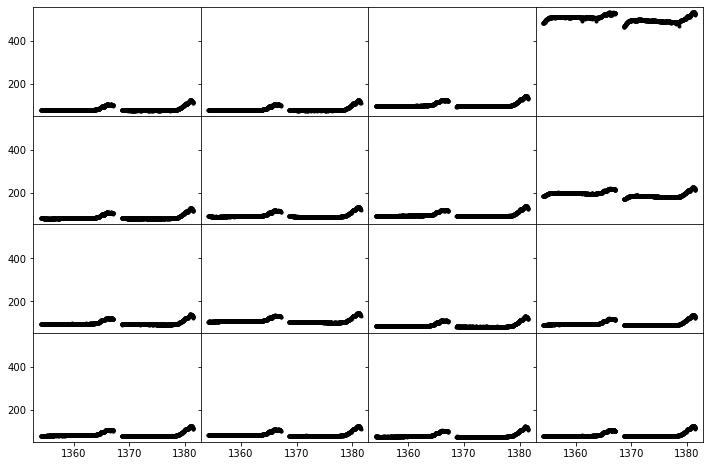

(<Figure size 864x576 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe59116bb10>,
       dtype=object))

In [20]:
sn2.plot_pix_by_pix(data_type="raw")

In [21]:
sn2.add_cpm_model(predictor_method="similar_brightness")
sn2.add_poly_model()
sn2.set_regs([0.001, 0.1])
sn2.holdout_fit_predict(k=50);

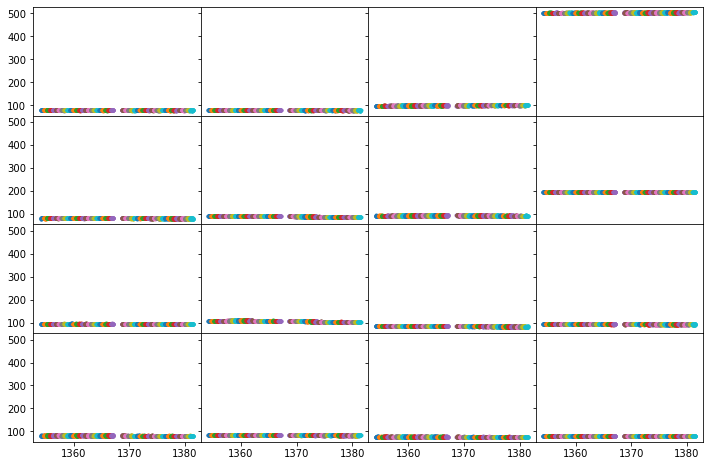

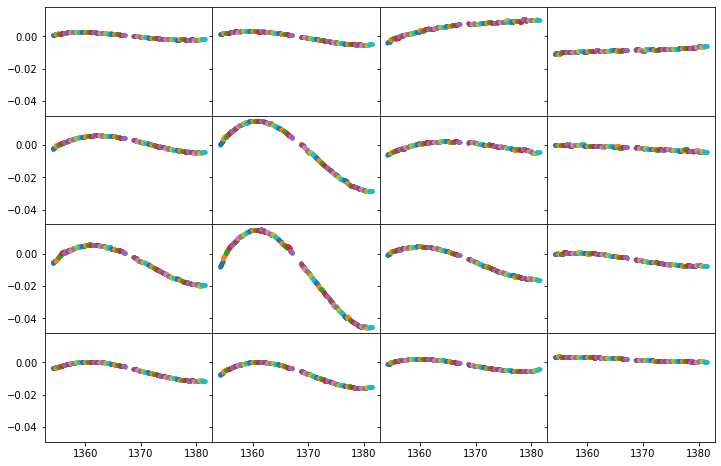

(<Figure size 864x576 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e4c99550>,
       dtype=object))

In [22]:
sn2.plot_pix_by_pix(data_type="rescaled_cpm_subtracted_flux", split=True)
sn2.plot_pix_by_pix(data_type="poly_model_prediction", split=True)

In [23]:
sector2_cpm_subtracted_flux = sn2.get_aperture_lc(data_type="cpm_subtracted_flux")

Summing over 4 x 4 pixel lightcurves


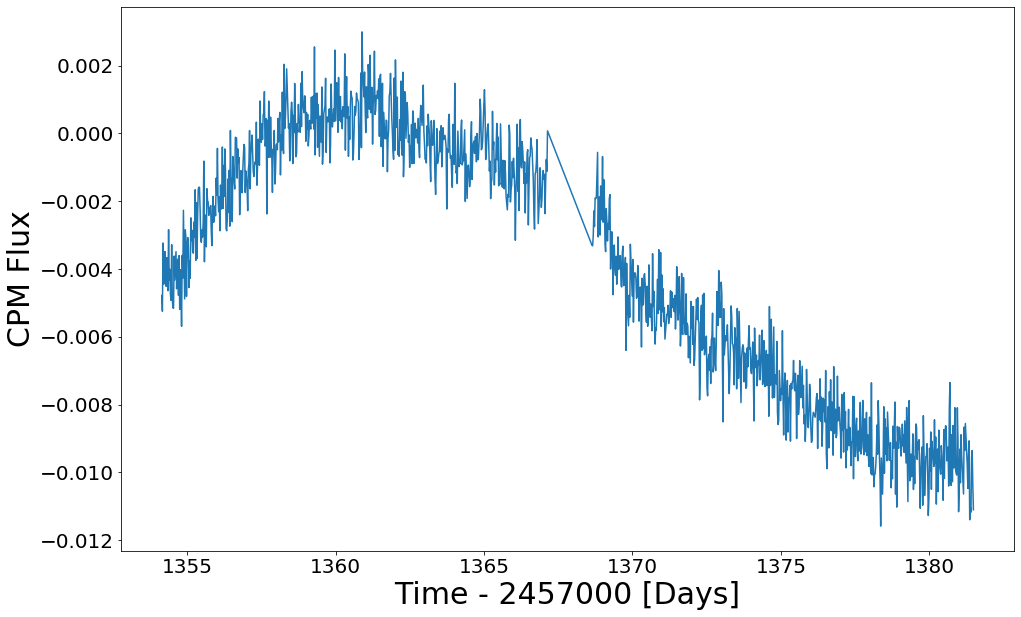

In [24]:
plt.figure(figsize=(16, 10))
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.plot(sn2.time, sector2_cpm_subtracted_flux)
plt.tick_params(labelsize=20)

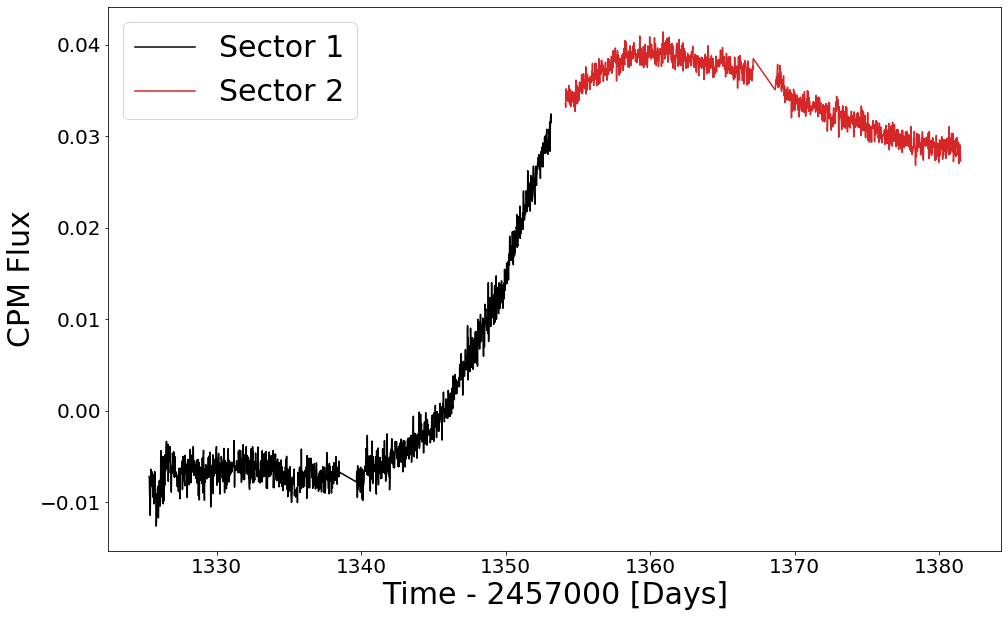

In [25]:
diff, st_time, st_lc = tess_cpm.utils.stitch_sectors(sn.time, sn2.time, sector1_cpm_subtracted_flux, sector2_cpm_subtracted_flux)
plt.figure(figsize=(16, 10))
plt.plot(sn.time, sector1_cpm_subtracted_flux, c="k", label="Sector 1")
plt.plot(sn2.time, sector2_cpm_subtracted_flux + diff, c="C3", label="Sector 2")
# plt.plot(sn2.time, )

plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(fontsize=30)
# plt.savefig("sector1&2_asassn-18tb_cpm_flux.png", dpi=300)

In [ ]:
# ASASSN-19bt
file_sec7 = "supernovae/tess-s0007-4-1_105.047542_-66.040322_64x64_astrocut.fits"
file_sec8 = "supernovae/tess-s0008-4-1_105.047542_-66.040322_64x64_astrocut.fits"
file_sec9 = "supernovae/tess-s0009-4-1_105.047542_-66.040322_64x64_astrocut.fits"

In [ ]:
sec7 = tess_cpm.Source(file_sec7, remove_bad=True)
sec7.set_aperture(rowrange=[31, 34], colrange=[31, 34])
sec7.plot_cutout(show_aperture=True)
sec7.add_cpm_model()
sec7.add_poly_model()
sec7.set_regs([0.01, 0.1])
sec7.holdout_fit_predict(k=50);
sec7.plot_pix_by_pix("rescaled_cpm_subtracted_flux", split=True)
sec7_lc = sec7.get_aperture_lc("cpm_subtracted_flux")
plt.plot(sec7.time, sec7_lc)

In [ ]:
sec8 = tess_cpm.Source(file_sec8, remove_bad=True)
sec8.set_aperture(rowrange=[31, 34], colrange=[31, 34])
sec8.plot_cutout(show_aperture=True)
sec8.add_cpm_model()
sec8.add_poly_model()
sec8.set_regs([0.01, 0.1])
sec8.holdout_fit_predict(k=50);
sec8.plot_pix_by_pix("cpm_subtracted_flux", split=True)
sec8_lc = sec8.get_aperture_lc("cpm_subtracted_flux")
plt.plot(sec8.time, sec8_lc)

In [ ]:
sec9 = tess_cpm.Source(file_sec9, remove_bad=True)
sec9.set_aperture(rowrange=[31, 34], colrange=[31, 34])
sec9.plot_cutout(show_aperture=True)
sec9.add_cpm_model()
sec9.add_poly_model()
sec9.set_regs([0.01, 0.1])
sec9.holdout_fit_predict(k=50);
sec9.plot_pix_by_pix("cpm_subtracted_flux", split=True)
sec9_lc = sec9.get_aperture_lc("cpm_subtracted_flux")
plt.plot(sec9.time, sec9_lc)

In [ ]:
diff, stitched_time, stitched_lc = tess_cpm.utils.stitch_sectors(sec7.time, sec8.time, sec7_lc, sec8_lc, 100)
diff2, stitched_time2, stitched_lc2 = tess_cpm.utils.stitch_sectors(stitched_time, sec9.time, stitched_lc, sec9_lc, 100)

In [ ]:
plt.figure(figsize=(16, 10))
# plt.plot(stitched_time2, stitched_lc2, ".", c="gray", alpha=0.4)
plt.plot(sec7.time, sec7_lc, "-", c="k", label="Sector 7")
plt.plot(sec8.time, sec8_lc+diff, "-", c="C3", label="Sector 8")
plt.plot(sec9.time, sec9_lc+diff2, "-", c="C0", label="Sector 9")
plt.legend(fontsize=20, markerscale=5)
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.title("ASASSN-19bt (Tidal Disruption Event)", y=1, fontsize=40)
plt.tick_params(labelsize=20)
plt.savefig("asassn-19bt", dpi=300)